# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [10]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\john6\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\john6\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\john6\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\john6\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [9]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK 1513 ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK 1513 ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [29]:
my_stopwords = list(stopwords.words("english"))

from nltk.sentiment import SentimentIntensityAnalyzer
my_sentiment = SentimentIntensityAnalyzer()


## Macbeth

Make a list of the words in Macbeth by tokenizing `macbeth_string`:

In [83]:
macbeth_tokens = word_tokenize(macbeth_string)

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.  To do this:
* Write a for loop that iterates over your Macbeth word list
  * If the compound score of a word is positive, add the word to the positive-word list
  * If the compound score of a word is negative, add the word to the negative-word list
  * If the compound score is 0, the word should not be added to either list

In [80]:
positive_words = []
negative_words = []
for word in macbeth_tokens:
    score = my_sentiment.polarity_scores(word)['compound']
    if score > 0:
        positive_words.append(word)
    elif score < 0:
        negative_words.append(word)

#print(f"POSITIVE:\n , {positive_words}")
#print(f"NEGATIVE:\n , {negative_words}")
    

1. Find the 15 most common negative words in Macbeth and the 15 most common positive words
    * Note that if you have a list variable called `mylist`, you can get the frequencies of words in `mylist` by using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.
2. Make a horizontal bar plot similar to the plots in the following image
3. Comment on similarities and differences to the Macbeth plot below

(Plot taken from a [2018 post by Peer Chirstensen](https://web.archive.org/web/20230129014418/https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/))

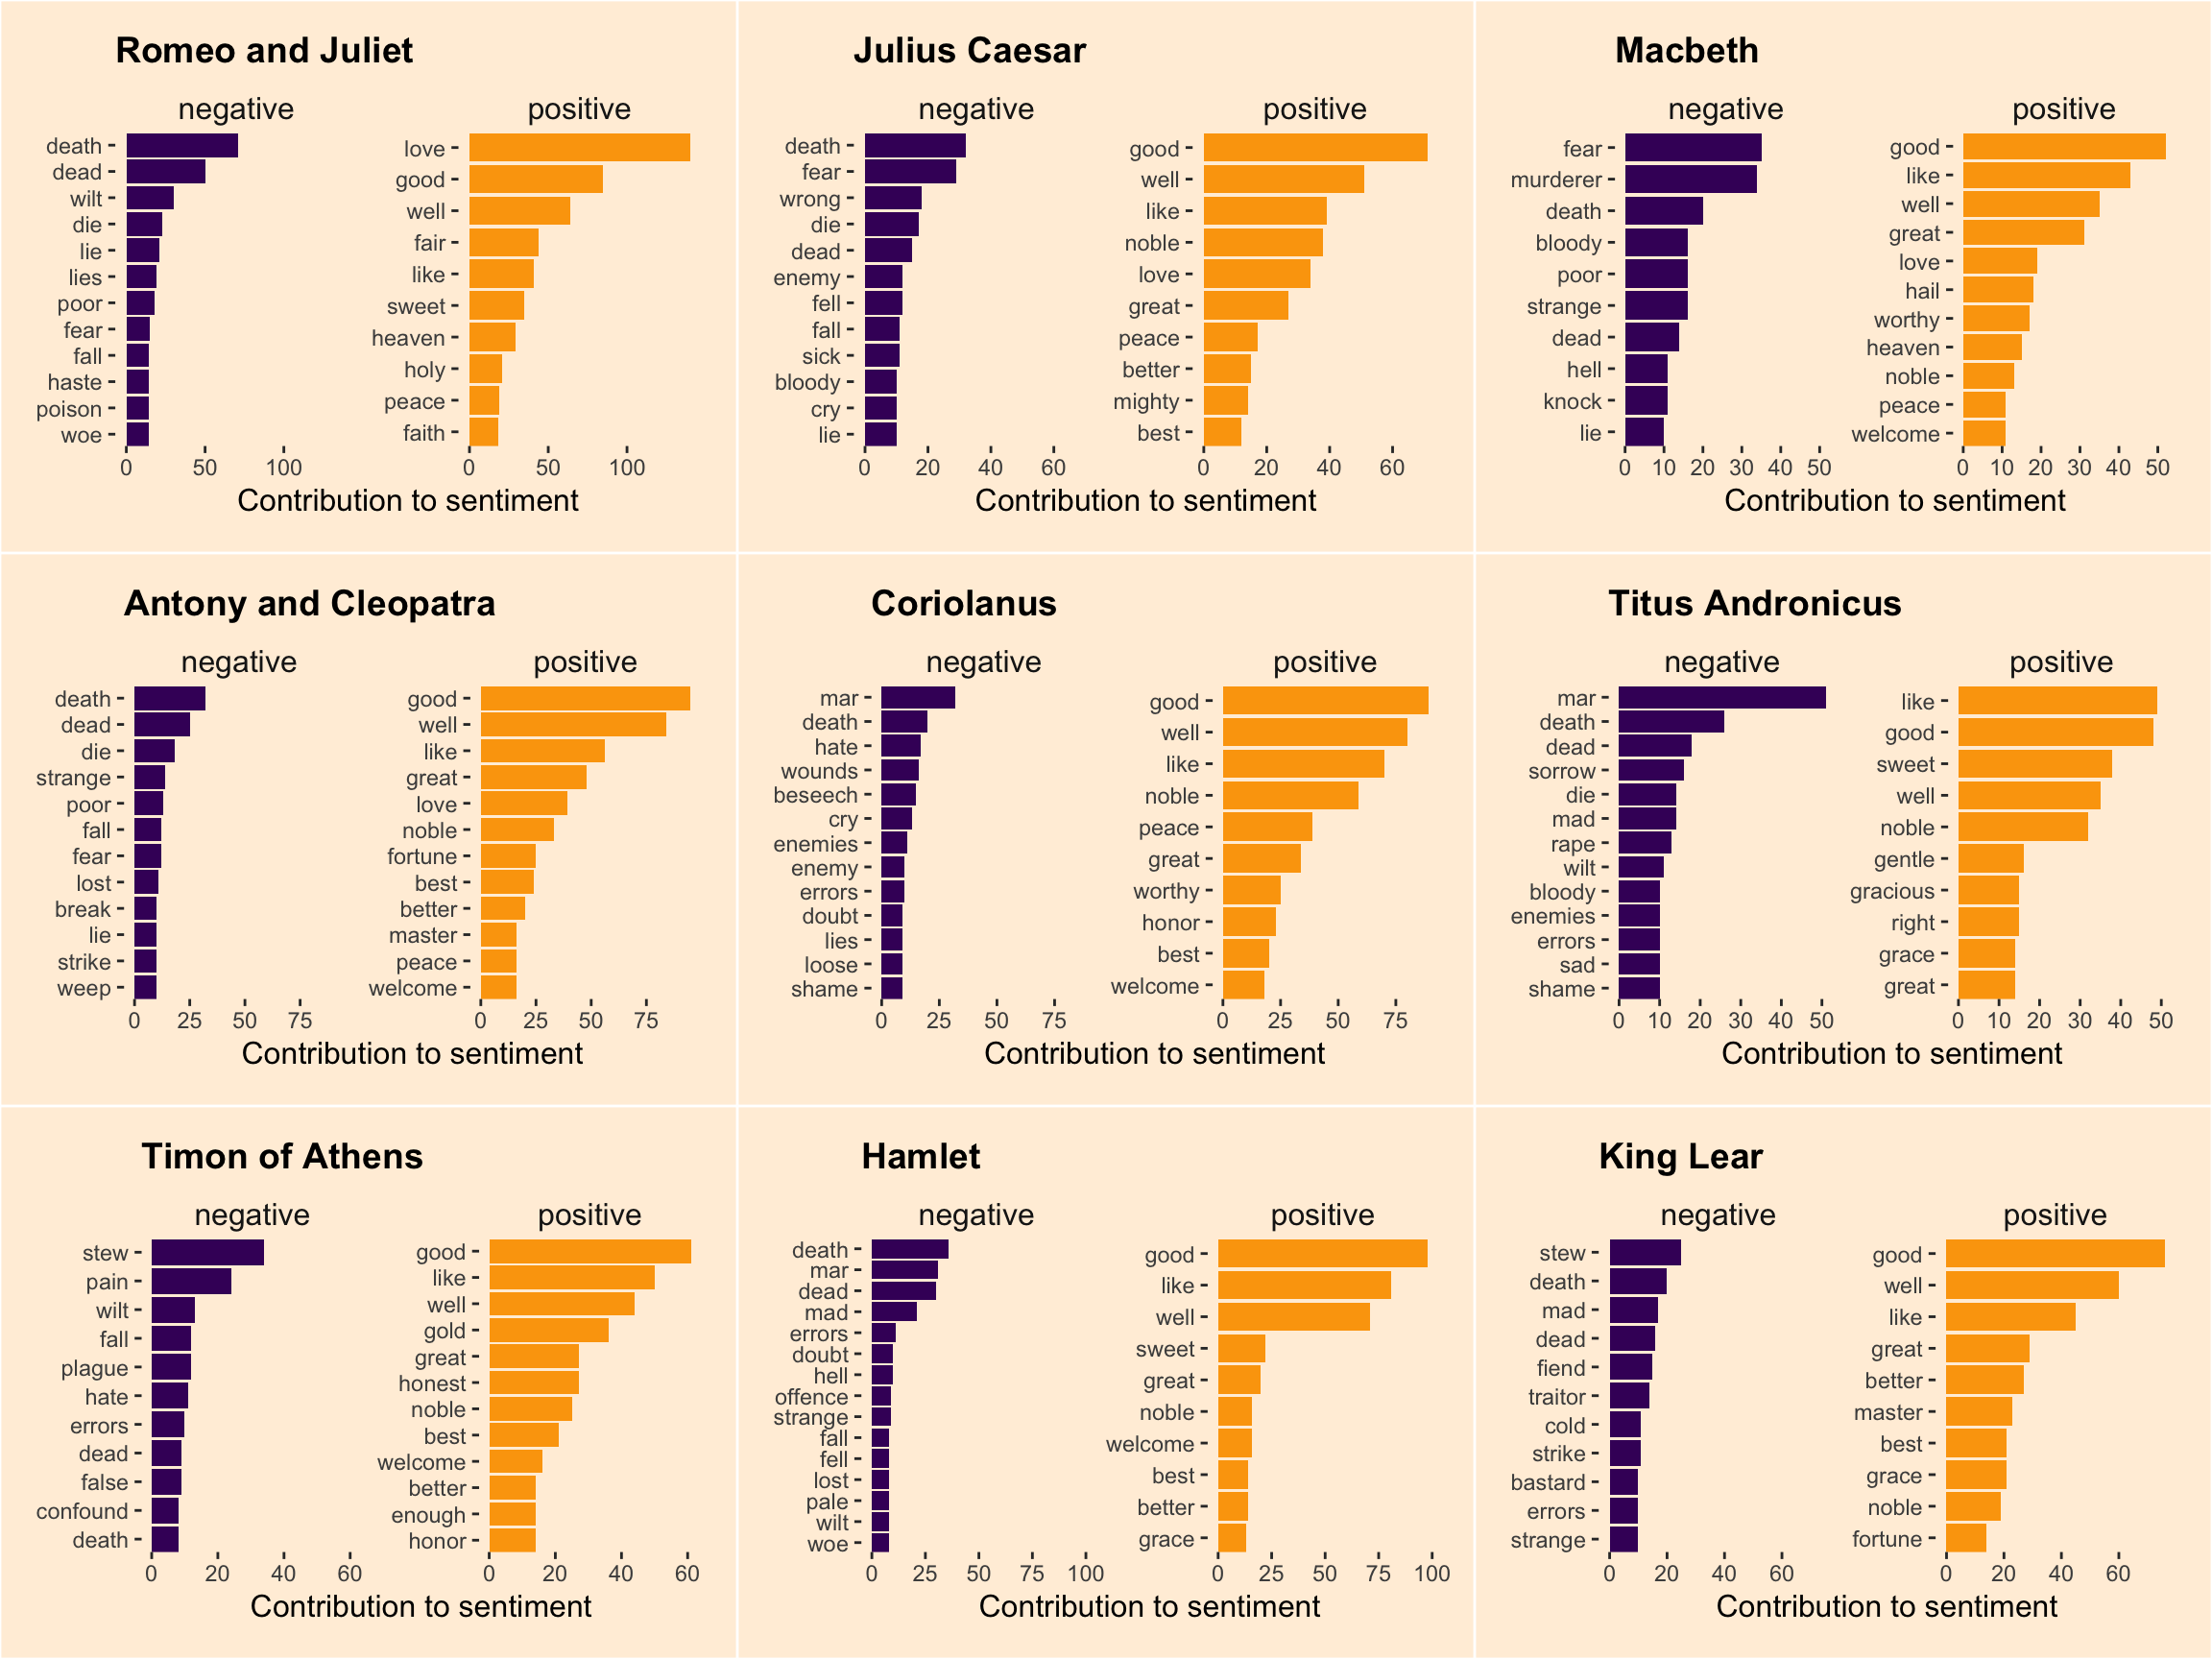

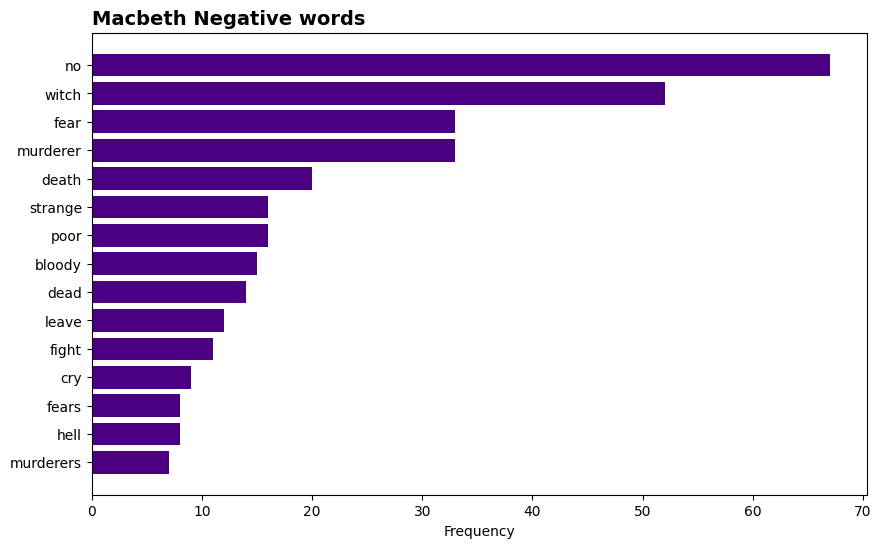

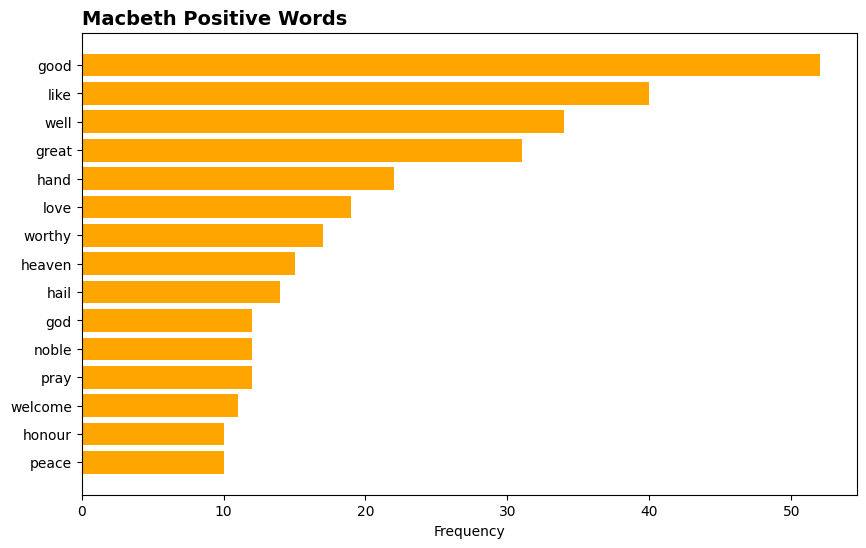

In [81]:
positive_freqs = nltk.FreqDist(positive_words).most_common(15)
negative_freqs = nltk.FreqDist(negative_words).most_common(15)

import numpy as np

def plot_word_frequency(frequency_list, title, color):
    wrds, frqs = zip(*frequency_list)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    y_neg = np.arange(len(wrds))
    ax.barh(y_neg, frqs, color=color, align='center', label='Negative')
    
    ax.set_yticks(y_neg)
    ax.set_yticklabels(wrds)
    ax.invert_yaxis()
    ax.set_title(title, fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Frequency', fontsize=10)
    plt.show()

plot_word_frequency(negative_freqs, "Macbeth Negative words", "indigo")
plot_word_frequency(positive_freqs, "Macbeth Positive Words", "orange")

I see stopwords, and also some non-shared words like witch and hand

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

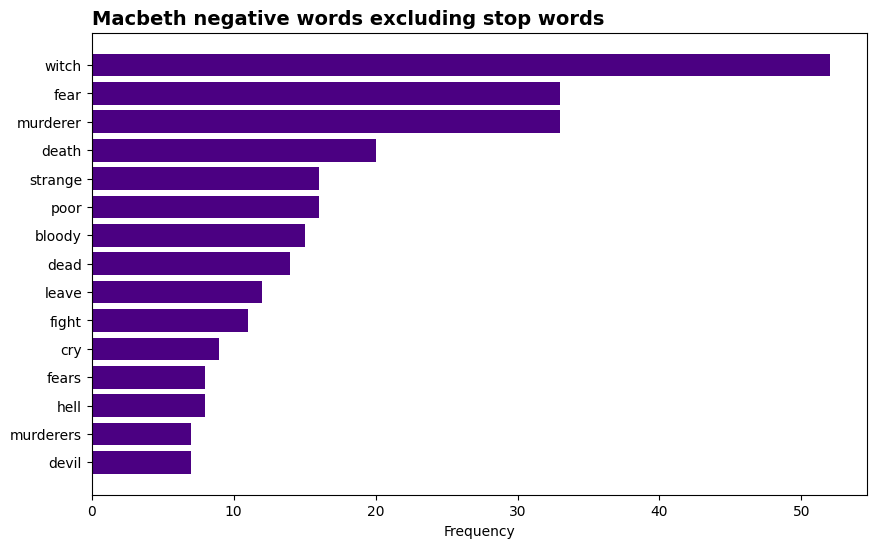

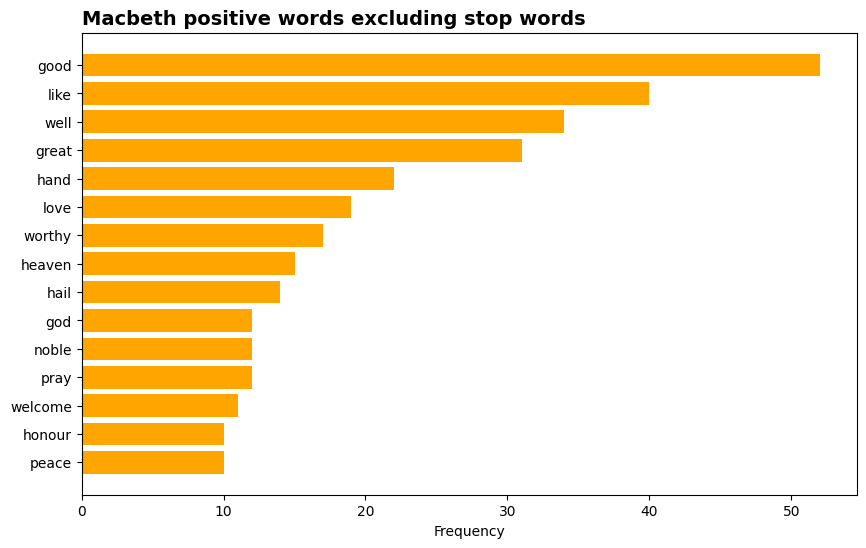

In [92]:
positive_no_stopwords = [word for word in positive_words if word not in my_stopwords]
positive_freqs_no_stopwords = nltk.FreqDist(positive_no_stopwords).most_common(15)

negative_no_stopwords = [word for word in negative_words if word not in my_stopwords]
negative_freqs_no_stopwords = nltk.FreqDist(negative_no_stopwords).most_common(15)

plot_word_frequency(negative_freqs_no_stopwords, "Macbeth negative words excluding stop words", 'indigo')
plot_word_frequency(positive_freqs_no_stopwords, "Macbeth positive words excluding stop words", 'orange')


Most common word in negative list, "no", gets excluded.

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

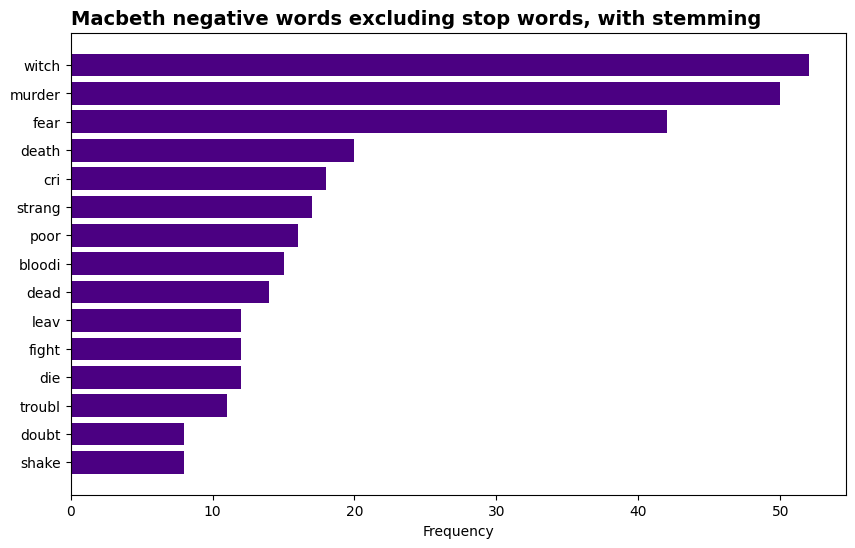

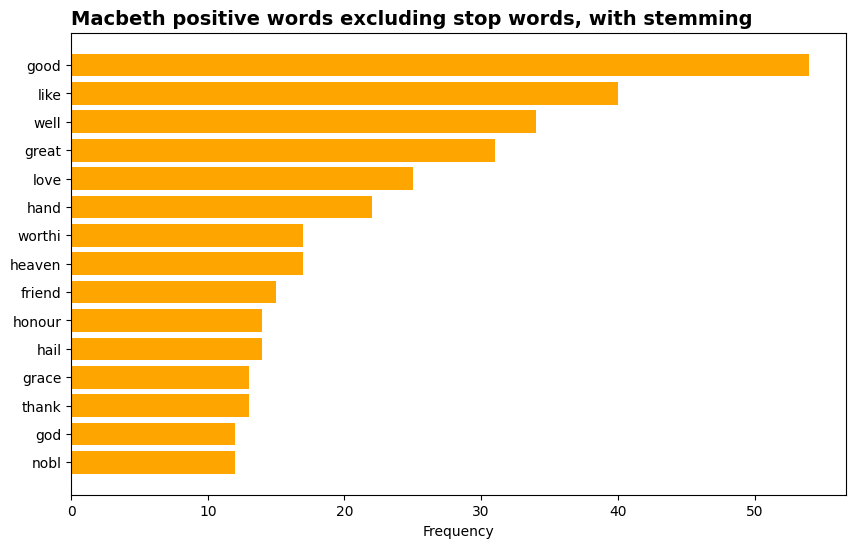

In [94]:
stemmer = PorterStemmer()

positive_stemmed_words = [stemmer.stem(word) for word in positive_no_stopwords]
positive_stemmed_freqs = nltk.FreqDist(positive_stemmed_words).most_common(15)

negative_stemmed_words = [stemmer.stem(word) for word in negative_no_stopwords]
negative_stemmed_freqs = nltk.FreqDist(negative_stemmed_words).most_common(15)

plot_word_frequency(negative_stemmed_freqs, "Macbeth negative words excluding stop words, with stemming", 'indigo')
plot_word_frequency(positive_stemmed_freqs, "Macbeth positive words excluding stop words, with stemming", 'orange')

Enter comments here.
- We see many stems that arent words but you could imagine are part of many relevant words like "cri".

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):

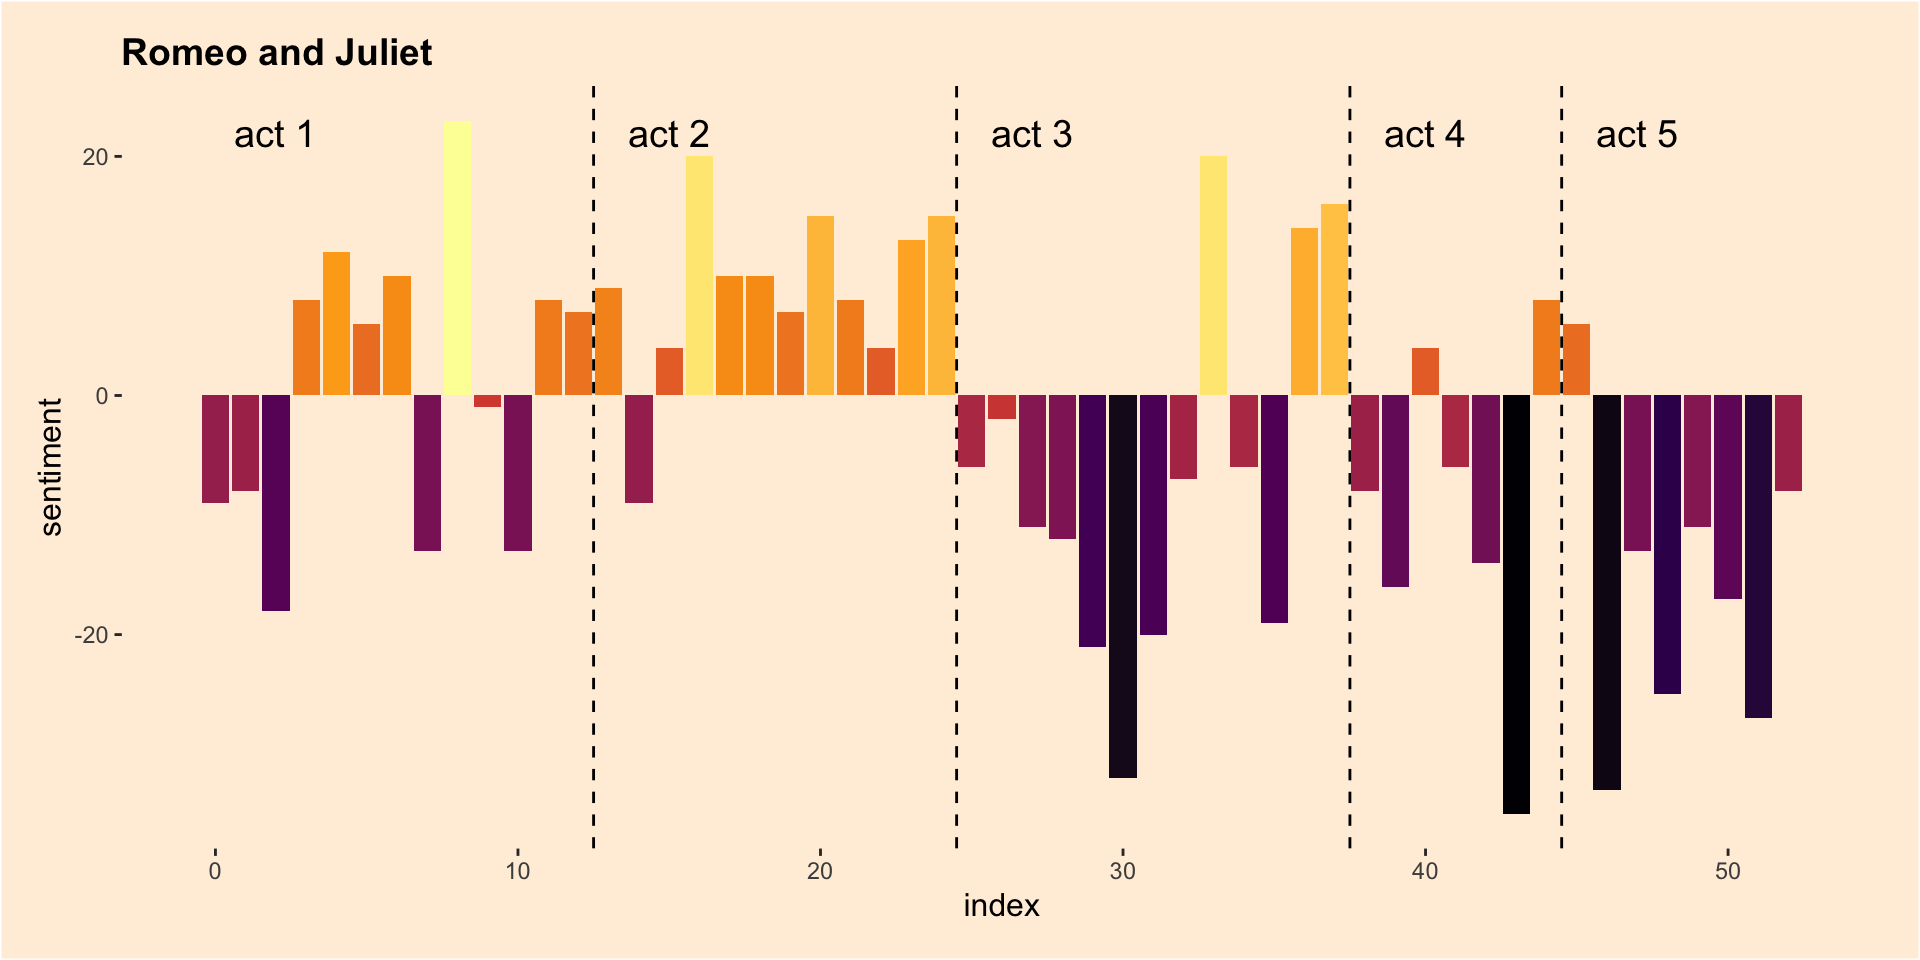

We are going to make a couple different plots.

First:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Sum the compound sentiment scores of every word in the scene (using VADER's SentimentIntensityAnalyser's polarity_scores method to get the compound sentiment score for each word).
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

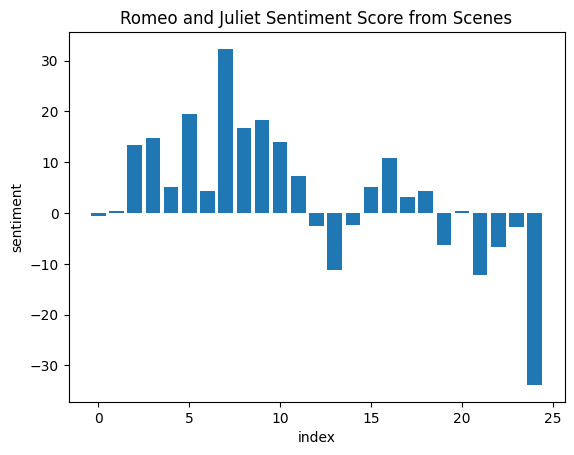

In [102]:
scene_sentiment_sums = []
for scene in r_j_scenes:
    scene_words = nltk.word_tokenize(scene)
    compound_sum = 0
    for word in scene_words:
        compound_sum += my_sentiment.polarity_scores(word)['compound']
    scene_sentiment_sums.append(compound_sum)

fig, ax = plt.subplots()
bars = ax.bar(range(len(scene_sentiment_sums)), scene_sentiment_sums)

ax.set_xlabel('index')
ax.set_ylabel('sentiment')
ax.set_title('Romeo and Juliet Sentiment Score from Scenes')

plt.show()

My chart appears to reflect similar trends as the one above, just with less fancy color and half as many indices.

Second:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

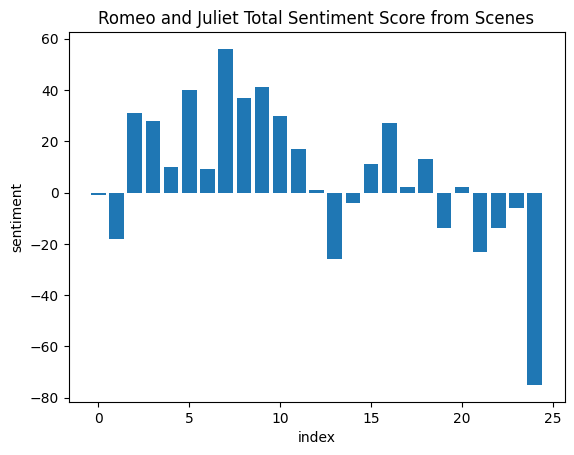

In [104]:
scene_total_scores = []
for scene in r_j_scenes:
    scene_words = nltk.word_tokenize(scene)
    scene_score = 0
    for word in scene_words:
        word_score = my_sentiment.polarity_scores(word)['compound']
        if word_score > 0:
            scene_score += 1
        elif word_score < 0:
            scene_score -= 1
    scene_total_scores.append(scene_score)

fig, ax = plt.subplots()
bars = ax.bar(range(len(scene_total_scores)), scene_total_scores)

ax.set_xlabel('index')
ax.set_ylabel('sentiment')
ax.set_title('Romeo and Juliet Total Sentiment Score from Scenes')

plt.show()

Enter comments here.
The shape looks very similar, just with more drastic values due to normalization.

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [105]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [116]:
testword = 'food'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

food is neither positive nor negative


Third plot:

* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

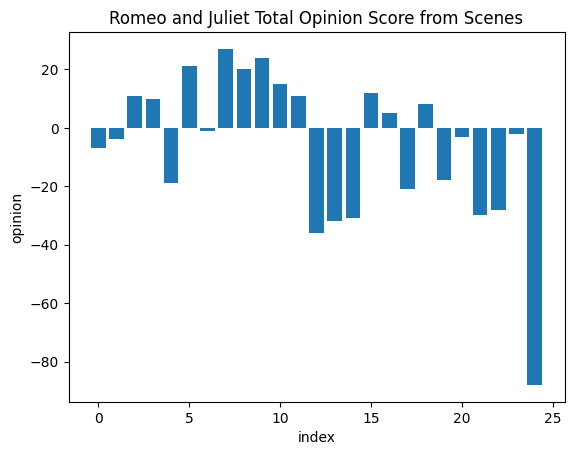

In [117]:
scene_opinion_scores = []
for scene in r_j_scenes:
    scene_words = nltk.word_tokenize(scene)
    scene_score = 0
    for word in scene_words:
        if word in positive_words:
            scene_score += 1
        elif word in negative_words:
            scene_score -= 1
    scene_opinion_scores.append(scene_score)

fig, ax = plt.subplots()
bars = ax.bar(range(len(scene_opinion_scores)), scene_opinion_scores)

ax.set_xlabel('index')
ax.set_ylabel('opinion')
ax.set_title('Romeo and Juliet Total Opinion Score from Scenes')

plt.show()

Enter comments here.
Scoring the scene this way gives it a very unique shape. It's interesting to see multiple indices get flipped entirely from positive to negative.

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

64.874


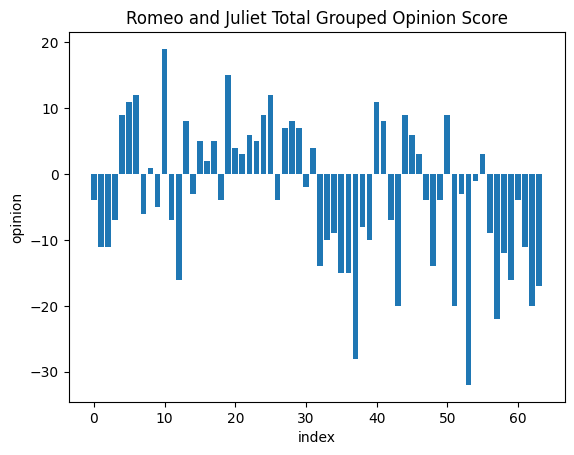

In [124]:
r_j_words = nltk.word_tokenize(r_j_string)
print(len(r_j_words)/500) # count of indices

grouped_opinion_scores = []
index = 0
counter = 0
cur_score = 0
while index < len(r_j_words):
    if counter == 500:
        grouped_opinion_scores.append(cur_score)
        counter = 0
        cur_score = 0
        
    if r_j_words[index] in positive_words:
        cur_score += 1
    elif r_j_words[index] in negative_words:
        cur_score -= 1
        
    index += 1
    counter += 1

fig, ax = plt.subplots()
bars = ax.bar(range(len(grouped_opinion_scores)), grouped_opinion_scores)

ax.set_xlabel('index')
ax.set_ylabel('opinion')
ax.set_title('Romeo and Juliet Total Grouped Opinion Score')

plt.show()

Enter comments here.
This one appears way more drastic and chaotic, and interestingly, also a lot less positive.

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

Enter comments here.
I would probably choose to use polarity scores over normalized opinion scores, simply because they present an exact quantification. This allows for a better measurement of difference in prose across words, essentially choosing quality positive/negative of words over quantity. For these reasons, I'd use the very first graph.